In [1]:
import numpy as np 
import yt 
import aglio
import glob
import re
import os
import time
import logging
import pickle
import pkg_resources
import yt_idv
import argparse

from typing import List
from multiprocessing import Pool
from scipy.spatial import cKDTree
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper

from yt_tools.yt_spherical_3D import aia_response, spherical_data

In [3]:
dat_path = '../data_low_rho' # .dat 文件的路径
instance = spherical_data(dat_path, fields_save_path='./exm4magline_fields', n_car=400)

yt : [INFO     ] 2024-04-16 15:09:44,379 Parameters: current_time              = 0.12511475
yt : [INFO     ] 2024-04-16 15:09:44,380 Parameters: domain_dimensions         = [400 280 320]
yt : [INFO     ] 2024-04-16 15:09:44,381 Parameters: domain_left_edge          = [1.001      1.23150432 3.14578153]
yt : [INFO     ] 2024-04-16 15:09:44,383 Parameters: domain_right_edge         = [1.801      2.40436566 4.48619418]
yt : [INFO     ] 2024-04-16 15:09:44,384 Parameters: cosmological_simulation   = 0


Initialization completed in 40.884528398513794 seconds


In [6]:
# extract the fields
'''
dr            :   要切除掉的层的厚度，可缺省，默认为 0
fields_list   :   需要提取的物理场，可以缺省（不推荐），默认为 ['rho','e','m1','m2','m3','b1','b2','b3']
auto_skip     :   检测是否已经存在文件，并自动跳过，可以确认，默认为 False
n_cut         :   要切掉几层，可以缺省，默认为 0
begin         :   从第几帧开始，可以缺省，默认为 0
end           :   结束帧，可以缺省，默认为 -1 (全部）
'''
instance.save_fields(dr = 0.0, fields_list=['b1','b2','b3'], auto_skip=True, n_cut=0, begin=0, end=0)
# 作为简单例子就以第0帧为例

yt : [INFO     ] 2024-04-16 15:19:33,757 Parameters: current_time              = 0.12511475
yt : [INFO     ] 2024-04-16 15:19:33,758 Parameters: domain_dimensions         = [400 280 320]
yt : [INFO     ] 2024-04-16 15:19:33,759 Parameters: domain_left_edge          = [1.001      1.23150432 3.14578153]
yt : [INFO     ] 2024-04-16 15:19:33,760 Parameters: domain_right_edge         = [1.801      2.40436566 4.48619418]
yt : [INFO     ] 2024-04-16 15:19:33,762 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-04-16 15:19:34,753 e not found and no parfile passed, can not set thermal_pressure.


Get indexs time: 79.365 sec
process: 0001/0001,  field:    b1, time:  6.270 sec
process: 0001/0001,  field:    b2, time:  5.349 sec
process: 0001/0001,  field:    b3, time:  5.235 sec
!!!    File ./exm4magline_fields/fields0000.npz is created     !!!


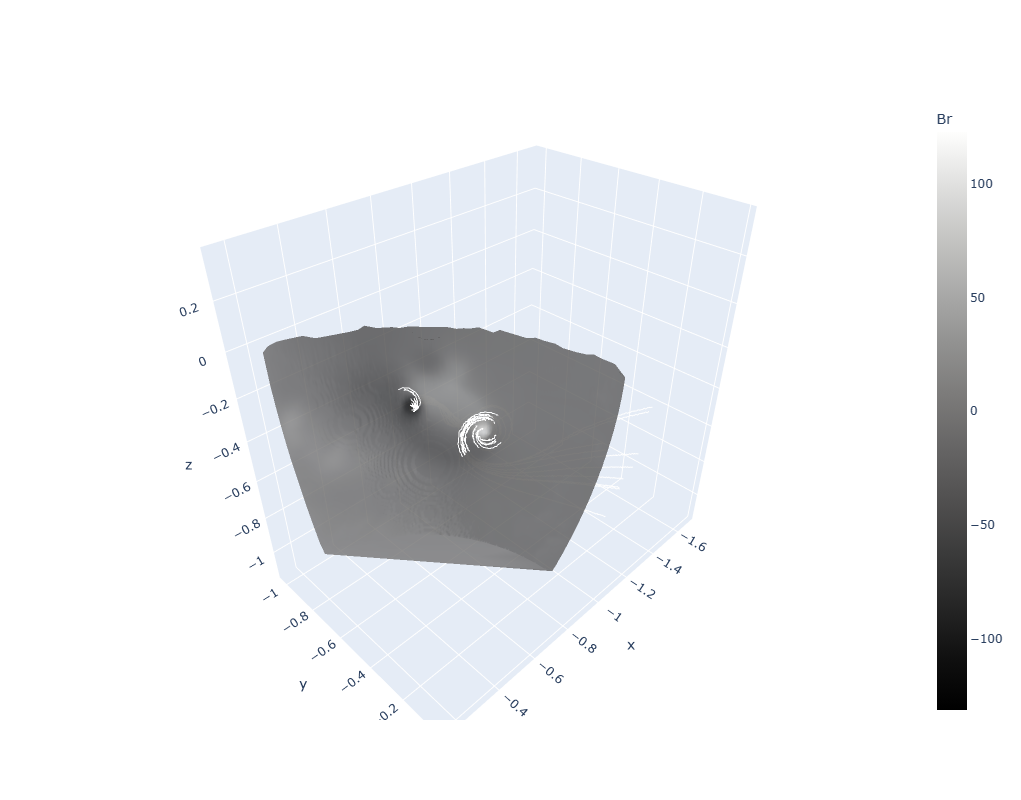

In [8]:
x0,y0,z0 = -0.676, -0.727, -0.350
'''
spherical_data.show_magline need the following input:
p ([x0,y0,z0])    :  磁力线的初始点，需要参数
radius            :  在一个球形内取样磁力线，可以缺省，默认为 0.01
frame             :  对某一帧画磁力线，可缺省，默认为 0
n_lines           :  取多少条磁力线，可缺省，默认为 10
r_slice           :  显示一个底边界的切片，默认为数据的下界
补充：一般第一次可视化会涉及到分量转化和坐标存取，因此稍微慢一些，后续重复会比较快
'''
instance.show_magline([x0,y0,z0], radius=0.02, frame=0, n_lines=10, r_slice=1.05)